## Processing Original Image

In [1]:
import cv2 as cv
import numpy as np

lightFieldImage = cv.imread('img_01.png')

### High Pass Filter

In [2]:
highPassFilter = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 1]])

print("Shape of Original Image", lightFieldImage.shape)
print("Shape of High Pass Filter", highPassFilter.shape)

Shape of Original Image (360, 360, 3)
Shape of High Pass Filter (3, 3)


#### Add singleton dimension to High Pass Filter
Since Original image is 3D & High Pass Filter is 2D.

In [3]:
highPassFilter = highPassFilter[:, :, None]
print("Shape of High Pass Filter", highPassFilter.shape)

Shape of High Pass Filter (3, 3, 1)


#### Apply High Pass Filter

In [4]:
from scipy import ndimage

highPassFilteredImage = ndimage.convolve(lightFieldImage, highPassFilter)

#### Remove singleton dimension

In [5]:
highPassFilteredImage = highPassFilteredImage.squeeze()
# cv.imshow("Original Image", lightFieldImage)
# cv.imshow("High Pass Filtered Image", highPassFilteredImage)

#### Original Image
Show the image with matplotlib

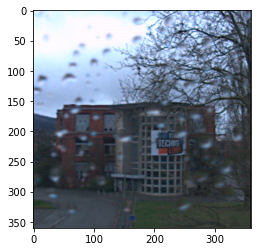

In [6]:
from matplotlib import pyplot as plt

plt.imshow(cv.cvtColor(lightFieldImage, cv.COLOR_BGR2RGB))
plt.show()

#### High Pass Filtered Image

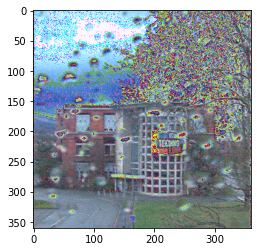

In [7]:
plt.imshow(cv.cvtColor(highPassFilteredImage, cv.COLOR_BGR2RGB))
plt.show()

### Read the depth map image file

In [8]:
depthMapImage = cv.imread('depth_01.png', cv.IMREAD_ANYDEPTH)

### Converting depth map image to its binary form

In [9]:
ret, binaryDepthMapImage = cv.threshold(depthMapImage, 127, 255, cv.THRESH_BINARY)

### Converting depth map image to its inverted binary form

In [10]:
ret, invertedBinaryDepthMapImage = cv.threshold(depthMapImage, 127, 255, cv.THRESH_BINARY_INV)

In [11]:
# Show the image with opencv
# cv.imshow("Original Depth Map Image", depthMapImage)
# cv.imshow("Binary Image of Depth Map Image", binaryDepthMapImage)

#### Original Depth Map Image

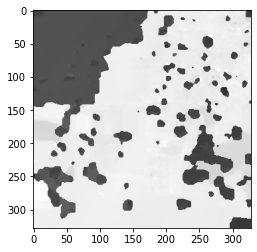

In [12]:
plt.imshow(cv.cvtColor(depthMapImage, cv.COLOR_BGR2RGB))
plt.show()

#### Binary Image of Depth Map Image

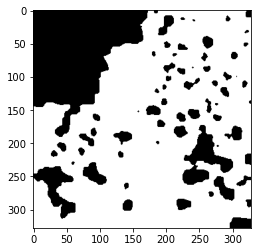

In [13]:
plt.imshow(cv.cvtColor(binaryDepthMapImage, cv.COLOR_BGR2RGB))
plt.show()

#### Inverted Binary Image of Depth Map Image

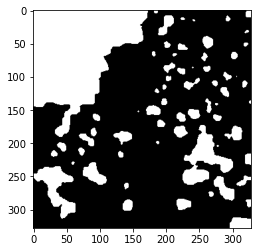

In [14]:
plt.imshow(cv.cvtColor(invertedBinaryDepthMapImage, cv.COLOR_BGR2RGB))
plt.show()

### Closing operation on Binary Image of Depth Map Image

In [15]:
kernel = np.ones((5, 5), np.uint8)
binaryDepthMapImageWithClosing = cv.morphologyEx(binaryDepthMapImage, cv.MORPH_CLOSE, kernel)

# cv.imshow("Binary Image of Depth Map after Closing", binaryDepthMapImageWithClosing)

#### Binary Image of Depth Map after Closing

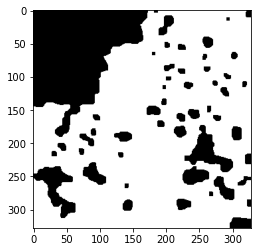

In [16]:
plt.imshow(cv.cvtColor(binaryDepthMapImageWithClosing, cv.COLOR_BGR2RGB))
plt.show()

### Opening Operation on Binary Image of Depth Map Image

In [17]:
binaryDepthMapImageWithClosingAndOpening = cv.morphologyEx(binaryDepthMapImageWithClosing,
                                                           cv.MORPH_OPEN, kernel)
# cv.imshow("Binary Image of Depth Map after Closing & Opening", binaryDepthMapImageWithClosingAndOpening)

#### Binary Image of Depth Map after Closing & Opening

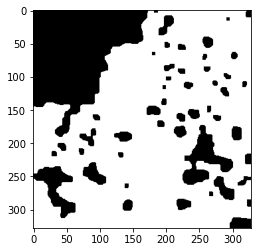

In [18]:
plt.imshow(cv.cvtColor(binaryDepthMapImageWithClosingAndOpening, cv.COLOR_BGR2RGB))
plt.show()

### Erosion Operation on Binary Image of Depth Map Image

In [19]:
binaryDepthMapImageWithClosingOpeningAndErosion = cv.erode(binaryDepthMapImageWithClosingAndOpening,
                                                           kernel,
                                                           iterations=1)
# cv.imshow("Binary Image of Depth Map after Closing, Opening & Erosion", binaryDepthMapImageWithClosingOpeningAndErosion)

#### Binary Image of Depth Map after Closing, Opening & Erosion

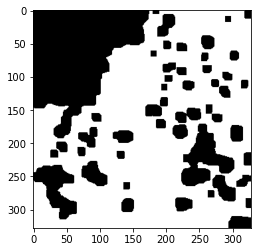

In [20]:
plt.imshow(cv.cvtColor(binaryDepthMapImageWithClosingOpeningAndErosion, cv.COLOR_BGR2RGB))
plt.show()

### Closing operation on Inverted Binary Image of Depth Map Image

In [21]:
kernel = np.ones((5, 5), np.uint8)
invertedBinaryDepthMapImageWithClosing = cv.morphologyEx(invertedBinaryDepthMapImage, cv.MORPH_CLOSE, kernel)

# cv.imshow("Binary Image of Depth Map after Closing", binaryDepthMapImageWithClosing)

#### Inverted Binary Image of Depth Map after Closing

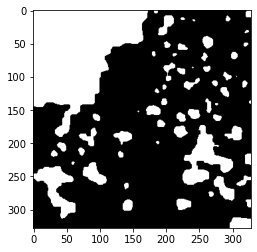

In [22]:
plt.imshow(cv.cvtColor(invertedBinaryDepthMapImageWithClosing, cv.COLOR_BGR2RGB))
plt.show()

### Opening Operation on Inverted Binary Image of Depth Map Image

In [23]:
invertedBinaryDepthMapImageWithClosingAndOpening = cv.morphologyEx(invertedBinaryDepthMapImageWithClosing,
                                                                   cv.MORPH_OPEN, kernel)
# cv.imshow("Binary Image of Depth Map after Closing & Opening", binaryDepthMapImageWithClosingAndOpening)

#### Inverted Binary Image of Depth Map after Closing & Opening

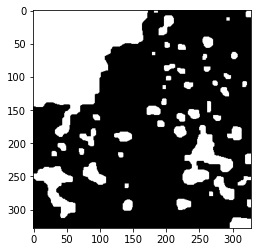

In [24]:
plt.imshow(cv.cvtColor(invertedBinaryDepthMapImageWithClosingAndOpening, cv.COLOR_BGR2RGB))
plt.show()

### Erosion Operation on Inverted Binary Image of Depth Map Image

In [25]:
invertedBinaryDepthMapImageWithClosingOpeningAndErosion = cv.erode(invertedBinaryDepthMapImageWithClosingAndOpening,
                                                                   kernel,
                                                                   iterations=1)
# cv.imshow("Binary Image of Depth Map after Closing, Opening & Erosion", binaryDepthMapImageWithClosingOpeningAndErosion)

#### Inverted Binary Image of Depth Map after Closing, Opening & Erosion

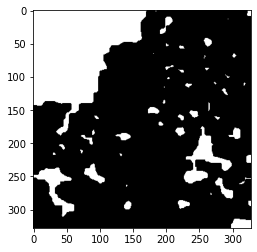

In [26]:
plt.imshow(cv.cvtColor(invertedBinaryDepthMapImageWithClosingOpeningAndErosion, cv.COLOR_BGR2RGB))
plt.show()

### Resizing High Pass Filtered Image

In [27]:
invertedBinaryDepthMapImageWithClosingOpeningAndErosionHeight, invertedBinaryDepthMapImageWithClosingOpeningAndErosionWidth = invertedBinaryDepthMapImageWithClosingOpeningAndErosion.shape[
                                                                                                                              :2]

resizedHighPassFilteredImage = cv.resize(highPassFilteredImage, (
    invertedBinaryDepthMapImageWithClosingOpeningAndErosionWidth,
    invertedBinaryDepthMapImageWithClosingOpeningAndErosionHeight),
                                         interpolation=cv.INTER_AREA)
# cv.imshow("High Pass Filtered Image after Resize", resizedHighPassFilteredImage)

### Resizing Original Image

In [28]:
resizedOriginalImage = cv.resize(lightFieldImage, (
    invertedBinaryDepthMapImageWithClosingOpeningAndErosionWidth,
    invertedBinaryDepthMapImageWithClosingOpeningAndErosionHeight),
                                 interpolation=cv.INTER_AREA)

#### High Pass Filtered Image after Resize

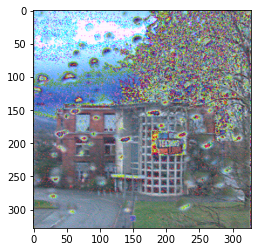

In [29]:
plt.imshow(cv.cvtColor(resizedHighPassFilteredImage, cv.COLOR_BGR2RGB))
plt.show()

#### Original Image after Resize

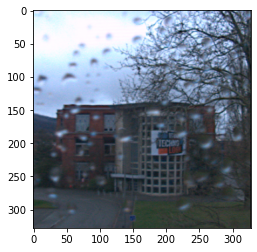

In [30]:
plt.imshow(cv.cvtColor(resizedOriginalImage, cv.COLOR_BGR2RGB))
plt.show()

### Image Composite

#### Create, Show & Write White Image

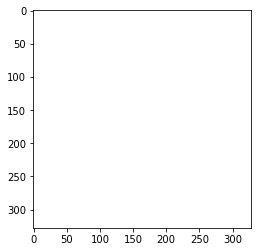

True

In [62]:
whiteImage = np.zeros([invertedBinaryDepthMapImageWithClosingOpeningAndErosionHeight,invertedBinaryDepthMapImageWithClosingOpeningAndErosionWidth,3],dtype=np.uint8)
whiteImage.fill(255)
plt.imshow(cv.cvtColor(whiteImage, cv.COLOR_BGR2RGB))
plt.show()

cv.imwrite('whiteImage.png',whiteImage)

#### Using Pillow

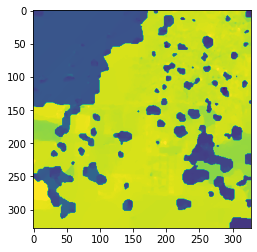

In [77]:
from PIL import Image

depthImage = Image.open('depth_01.png');
plt.imshow(depthImage)
plt.show()

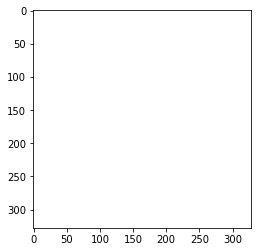

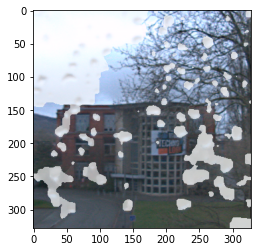

In [76]:
from PIL import ImageDraw, ImageOps

cv.imwrite('resizedOriginalImage_01.png',resizedOriginalImage)
cv.imwrite('invertedBinaryDepthMapImageWithClosingOpeningAndErosion_01.png',
           invertedBinaryDepthMapImageWithClosingOpeningAndErosion)

resizedOriginalImagePillow = Image.open('resizedOriginalImage_01.png')
whiteImage = Image.open('whiteImage.png')
invertedBinaryDepthMapImageWithClosingOpeningAndErosionPillow = Image.open('invertedBinaryDepthMapImageWithClosingOpeningAndErosion_01.png').convert("RGBA")

# mask = Image.new("L", resizedOriginalImagePillow.size, 128)

# mask = Image.new("L", resizedOriginalImagePillow.size, 0)
# draw = ImageDraw.Draw(mask)
# draw.ellipse((140, 50, 260, 170), fill=255)

# mask = Image.new("1", resizedOriginalImagePillow.size, 0)
# draw = ImageDraw.Draw(mask)
# draw.ellipse((140, 50, 260, 170), fill=255)

# compositeImage = Image.composite(whiteImage, resizedOriginalImagePillow, mask)

# compositeImage = Image.composite(whiteImage, resizedOriginalImagePillow, invertedBinaryDepthMapImageWithClosingOpeningAndErosionPillow)

# depthImagePillow =ImageOps.grayscale(ImageOps.invert(Image.open('depth_01.png')))

whiteImagePillow = Image.new("1", resizedOriginalImagePillow.size, (255))
plt.imshow(whiteImagePillow)
plt.show()

# compositeImage = Image.composite(whiteImage, resizedOriginalImagePillow, depthImagePillow)

compositeImage = Image.composite(whiteImagePillow, resizedOriginalImagePillow, depthImagePillow)

plt.imshow(compositeImage)
plt.show()

### Apply Mask on Resized High Filtered Image

In [32]:
maskedHighPassFilteredResizedImage = cv.bitwise_and(resizedHighPassFilteredImage, resizedHighPassFilteredImage,
                                                    mask=binaryDepthMapImageWithClosingOpeningAndErosion)
# cv.imshow("Resized High Pass Filtered Image after Masking", maskedHighPassFilteredImage)

#### Resized High Pass Filtered Image after Masking

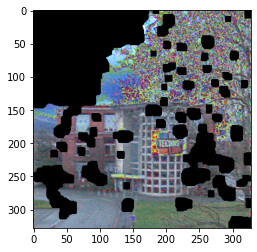

In [33]:
plt.imshow(cv.cvtColor(maskedHighPassFilteredResizedImage, cv.COLOR_BGR2RGB))
plt.show()

### Apply Mask on Resized Original Image

In [34]:
maskedResizedOriginalImage = cv.bitwise_and(resizedOriginalImage, resizedOriginalImage,
                                            mask=binaryDepthMapImageWithClosingOpeningAndErosion)
# cv.imshow("Resized High Pass Filtered Image after Masking", maskedHighPassFilteredImage)

#### Resized Original Image after Masking

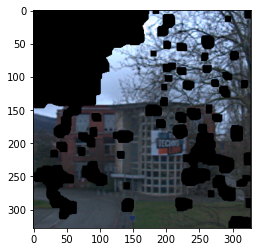

In [35]:
plt.imshow(cv.cvtColor(maskedResizedOriginalImage, cv.COLOR_BGR2RGB))
plt.show()

### Checking Resized Original Image

In [36]:
print("Array is of type: ", type(resizedOriginalImage))
print("No. of dimensions: ", resizedOriginalImage.ndim)
print("Shape of array: ", resizedOriginalImage.shape)
print("Size of array: ", resizedOriginalImage.size)
print("Array stores elements of type: ", resizedOriginalImage.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  3
Shape of array:  (328, 328, 3)
Size of array:  322752
Array stores elements of type:  uint8


### Checking Mask Image

In [37]:
print("Array is of type: ", type(binaryDepthMapImageWithClosingOpeningAndErosion))
print("No. of dimensions: ", binaryDepthMapImageWithClosingOpeningAndErosion.ndim)
print("Shape of array: ", binaryDepthMapImageWithClosingOpeningAndErosion.shape)
print("Size of array: ", binaryDepthMapImageWithClosingOpeningAndErosion.size)
print("Array stores elements of type: ", binaryDepthMapImageWithClosingOpeningAndErosion.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (328, 328)
Size of array:  107584
Array stores elements of type:  uint8


### Checking Masked Resized Original Image

In [38]:
print("Array is of type: ", type(maskedResizedOriginalImage))
print("No. of dimensions: ", maskedResizedOriginalImage.ndim)
print("Shape of array: ", maskedResizedOriginalImage.shape)
print("Size of array: ", maskedResizedOriginalImage.size)
print("Array stores elements of type: ", maskedResizedOriginalImage.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  3
Shape of array:  (328, 328, 3)
Size of array:  322752
Array stores elements of type:  uint8


### Apply Inverted Mask on Resized Original Image

In [39]:
invertedMaskedResizedOriginalImage = cv.bitwise_and(resizedOriginalImage,
                                                    resizedOriginalImage,
                                                    mask=invertedBinaryDepthMapImageWithClosingOpeningAndErosion)
# cv.imshow("Resized High Pass Filtered Image after Masking", maskedHighPassFilteredImage)

#### Resized Original Image after Inverted Masking

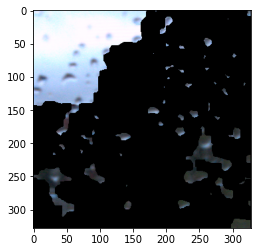

In [40]:
plt.imshow(cv.cvtColor(invertedMaskedResizedOriginalImage, cv.COLOR_BGR2RGB))
plt.show()

#### Saving the image - Using cv2.imwrite()

In [41]:
cv.imwrite('maskedHighPassFilteredResizedImage_01.png', maskedHighPassFilteredResizedImage)
cv.imwrite('maskedResizedOriginalImage_01.png', maskedResizedOriginalImage)

True

In [42]:
# cv.waitKey(0)
# cv.destroyAllWindows()

### Edge Connect
#### Example mask for edge connect

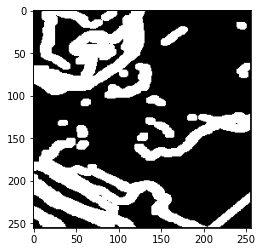

In [43]:
exampleMaskEdgeConnect = cv.imread('edge-connect/examples/places2/masks/places2_01.png')
plt.imshow(cv.cvtColor(exampleMaskEdgeConnect, cv.COLOR_BGR2RGB))
plt.show()

#### Inverted Binary Depth Map Image With Closing Opening And Erosion

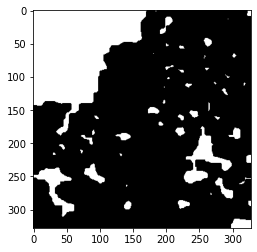

In [44]:
invertedBinaryDepthMapImageWithClosingOpeningAndErosion = cv.imread(
    'invertedBinaryDepthMapImageWithClosingOpeningAndErosion_01.png')
plt.imshow(cv.cvtColor(invertedBinaryDepthMapImageWithClosingOpeningAndErosion, cv.COLOR_BGR2RGB))
plt.show()

#### Example input image for edge connect

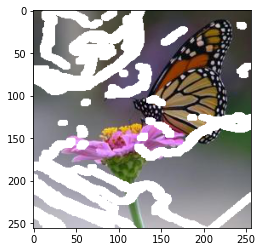

In [45]:
exampleMaskEdgeConnect = cv.imread('edge-connect/examples/places2/images/places2_01.png')
plt.imshow(cv.cvtColor(exampleMaskEdgeConnect, cv.COLOR_BGR2RGB))
plt.show()

#### Masked Resized Original Image

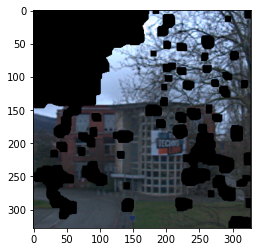

In [46]:
maskedResizedOriginalImage = cv.imread('maskedResizedOriginalImage_01.png')
plt.imshow(cv.cvtColor(maskedResizedOriginalImage, cv.COLOR_BGR2RGB))
plt.show()

### Results
#### Inverted Binary Depth Map Image With Closing Opening And Erosion

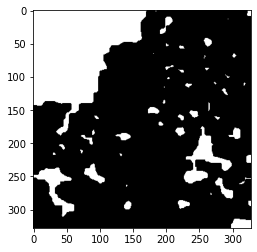

In [47]:
invertedBinaryDepthMapImageWithClosingOpeningAndErosion = cv.imread(
    'invertedBinaryDepthMapImageWithClosingOpeningAndErosion_01.png')
plt.imshow(cv.cvtColor(invertedBinaryDepthMapImageWithClosingOpeningAndErosion, cv.COLOR_BGR2RGB))
plt.show()

#### Masked Resized Original Image

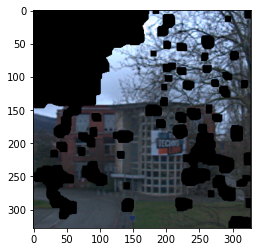

In [48]:
maskedResizedOriginalImage = cv.imread('maskedResizedOriginalImage_01.png')
plt.imshow(cv.cvtColor(maskedResizedOriginalImage, cv.COLOR_BGR2RGB))
plt.show()

#### Masked High Pass Filtered Resized Image

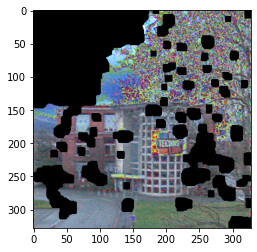

In [49]:
maskedHighPassFilteredResizedImage = cv.imread('maskedHighPassFilteredResizedImage_01.png')
plt.imshow(cv.cvtColor(maskedHighPassFilteredResizedImage, cv.COLOR_BGR2RGB))
plt.show()
